In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [17]:
raw_data = pd.read_csv('Admission_Predict.csv')

In [18]:
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
raw_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [51]:
data = raw_data.drop(['Serial No.'],1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


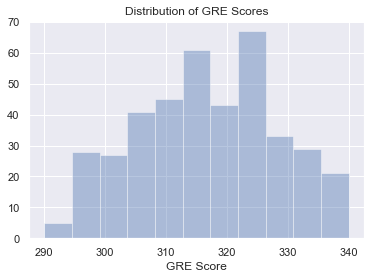

In [52]:
fig = sns.distplot(data['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

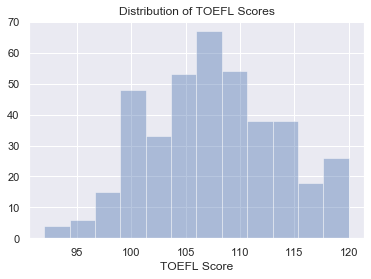

In [53]:
    fig = sns.distplot(data['TOEFL Score'], kde=False)
    plt.title("Distribution of TOEFL Scores")
    plt.show()

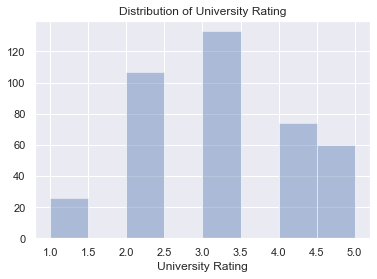

In [54]:
fig = sns.distplot(data['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

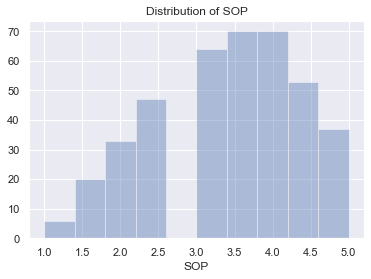

In [55]:
fig = sns.distplot(data['SOP'], kde=False)
plt.title("Distribution of SOP")
plt.show()

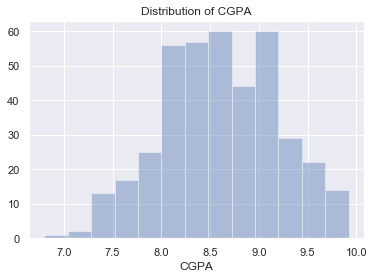

In [56]:
fig = sns.distplot(data['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

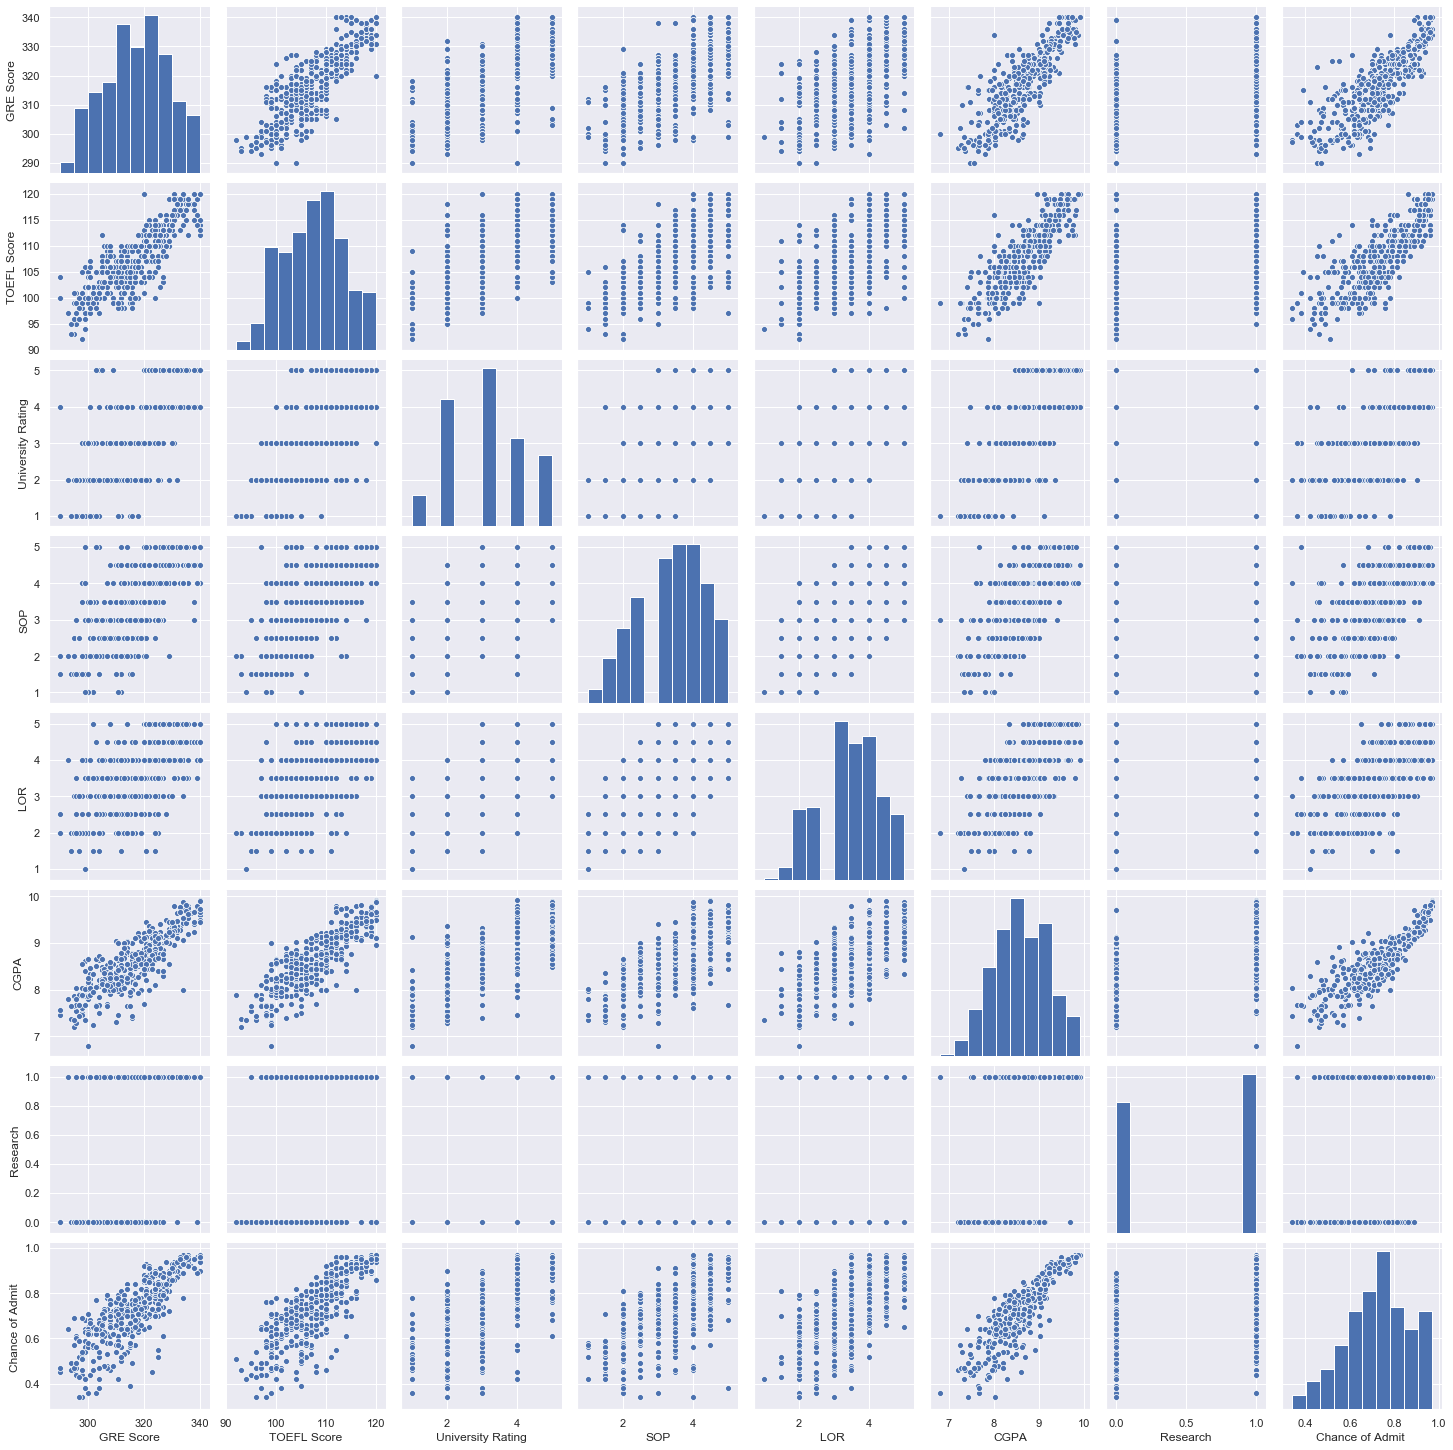

In [58]:
sns.pairplot(data)

## GRE Score increases then 

Chance of Admit increase

GPA increase

TOEFL increase

## Chance of Admits increases

SOP increase Chance of Admits increase

University increase chance of Admits increase

more reasearch more chance of Admit

### GRE TOEFL and GPA will impact directly on Chance of Admit than  

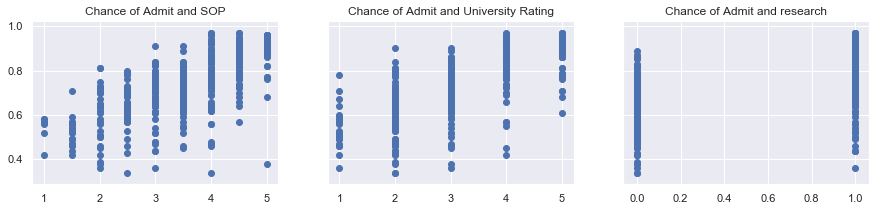

In [82]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data['SOP'], data['Chance of Admit '])
ax1.set_title('Chance of Admit and SOP')
ax2.scatter(data['University Rating'], data['Chance of Admit '])
ax2.set_title('Chance of Admit and University Rating')
ax3.scatter(data['Research'],data['Chance of Admit '])
ax3.set_title('Chance of Admit and research')

plt.show()

In [86]:
linear_regression = LinearRegression()

In [98]:
targets = data['Chance of Admit ']
inputs = data.drop(['Chance of Admit '], axis = 1)

## Train Test Split

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( inputs,targets, test_size=0.3, random_state=0)

In [158]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
y_hat = reg.predict(X_train)

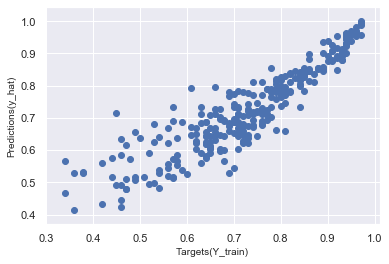

In [160]:
plt.scatter(Y_train, y_hat)
plt.xlabel('Targets(Y_train)', size = 10)
plt.ylabel('Predictions(y_hat)', size = 10)
plt.show()

In [161]:
## R-Squared
reg.score(X_train,Y_train)

0.8221063439698572

## Finding Weight and Bias

In [162]:
reg.intercept_

-1.314407091024913

In [163]:
reg.coef_

array([ 0.00186803,  0.0022731 ,  0.00270635, -0.0030745 ,  0.02071688,
        0.13025483,  0.02269622])

In [164]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,GRE Score,0.001868
1,TOEFL Score,0.002273
2,University Rating,0.002706
3,SOP,-0.003075
4,LOR,0.020717
5,CGPA,0.130255
6,Research,0.022696


## Testing

In [165]:
y_hat_test = reg.predict(X_test)

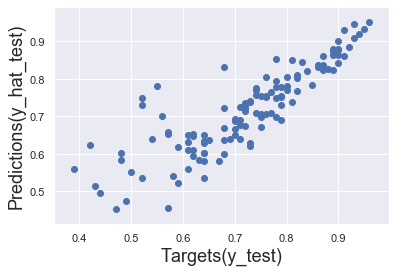

In [166]:
plt.scatter(Y_test, y_hat_test)
plt.xlabel('Targets(y_test)', size = 18)
plt.ylabel('Predictions(y_hat_test)', size = 18)

plt.show()

In [167]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,1.997211
1,2.000495
2,2.177567
3,1.858505
4,2.060803


In [168]:
df_pf['Target'] = np.exp(Y_test)
df_pf

,Predictions,Target
0,1.997211,nan
1,2.000495,2.138276
2,2.177567,nan
3,1.858505,nan
4,2.060803,1.915541
5,1.828560,2.459603
6,2.032258,2.117000
7,1.894223,1.973878
8,2.410835,1.648721
9,2.509630,nan


In [169]:
Y_test= Y_test.reset_index(drop=True)

In [170]:
Y_test.head()

0    0.710000
1    0.700000
2    0.790000
3    0.730000
4    0.720000
Name: Chance of Admit , dtype: float64

In [171]:
df_pf['Target'] = np.exp(Y_test)
df_pf

,Predictions,Target
0,1.997211,2.033991
1,2.000495,2.013753
2,2.177567,2.203396
3,1.858505,2.075081
4,2.060803,2.054433
5,1.828560,1.616074
6,2.032258,2.159766
7,1.894223,2.033991
8,2.410835,2.459603
9,2.509630,2.559981


In [172]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference
0,1.997211,2.033991,0.036780,1.808276
1,2.000495,2.013753,0.013258,0.658362
2,2.177567,2.203396,0.025829,1.172248
3,1.858505,2.075081,0.216575,10.436964
4,2.060803,2.054433,-0.006370,0.310063
5,1.828560,1.616074,-0.212486,13.148256
6,2.032258,2.159766,0.127508,5.903800
7,1.894223,2.033991,0.139768,6.871627
8,2.410835,2.459603,0.048768,1.982749
9,2.509630,2.559981,0.050351,1.966850


In [173]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '% 2f' % x)
df_pf.sort_values(by = ['Difference'])

,Predictions,Target,Residual,Difference
48,1.839492,1.840431,0.000939,0.051034
90,2.176845,2.181472,0.004628,0.212138
116,2.465428,2.459603,-0.005825,0.236842
4,2.060803,2.054433,-0.006370,0.310063
98,2.126451,2.117000,-0.009451,0.446419
99,2.147562,2.159766,0.012204,0.565080
51,2.238416,2.225541,-0.012875,0.578497
12,2.042162,2.054433,0.012271,0.597280
16,1.884118,1.896481,0.012363,0.651899
1,2.000495,2.013753,0.013258,0.658362
